# Install*

In [ ]:
# Tokenizer library 설치
!pip install sentencepiece

     |████████████████████████████████| 1.2MB 29.4MB/s 


# Evn*

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import tensorflow as tf

import os
import random

In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls
data_dir = '/content/drive/MyDrive/ict-ai-복합고급언어-nlp/data'
os.listdir(data_dir)

drive  sample_data


['data-20210420T111231Z-001.zip',
 'kowiki',
 'kowiki_32000.model',
 'kowiki_32000.vocab',
 'kowiki_mecab_32000.model',
 'kowiki_mecab_32000.vocab',
 'nsmc',
 'question_pair',
 'songys-chat',
 'kornli',
 'kornli.model',
 'kornli.vocab',
 'xnli.dev.ko.tsv',
 'xnli.test.ko.tsv',
 'multinli.train.ko.tsv',
 'snli_1.0_train.ko.tsv',
 'ner']

In [ ]:
kornli_dir = os.path.join(data_dir, 'kornli')
if not os.path.isdir(kornli_dir):
    os.makedirs(kornli_dir)
os.listdir(kornli_dir)

['abc.model', 'abc.vocab', 'baseline.hdf5', 'baseline.csv']

# Data*

In [ ]:
!wget https://raw.githubusercontent.com/kakaobrain/KorNLUDatasets/master/KorNLI/multinli.train.ko.tsv
# !wget https://raw.githubusercontent.com/kakaobrain/KorNLUDatasets/master/KorNLI/snli_1.0_train.ko.tsv
!wget https://raw.githubusercontent.com/kakaobrain/KorNLUDatasets/master/KorNLI/snli_1.0_train.ko.tsv
!wget https://raw.githubusercontent.com/kakaobrain/KorNLUDatasets/master/KorNLI/xnli.dev.ko.tsv
!wget https://raw.githubusercontent.com/kakaobrain/KorNLUDatasets/master/KorNLI/xnli.test.ko.tsv

--2021-06-09 10:25:17--  https://raw.githubusercontent.com/kakaobrain/KorNLUDatasets/master/KorNLI/multinli.train.ko.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83550821 (80M) [text/plain]
Saving to: ‘multinli.train.ko.tsv’

multinli.train.ko.t 100%[===================>]  79.68M   196MB/s    in 0.4s    

2021-06-09 10:25:18 (196 MB/s) - ‘multinli.train.ko.tsv’ saved [83550821/83550821]

--2021-06-09 10:25:18--  https://raw.githubusercontent.com/kakaobrain/KorNLUDatasets/master/KorNLI/snli_1.0_train.ko.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, await

In [ ]:
!ls
# drive.mount('/content/drive/MyDrive/ict-ai-복합고급언어-nlp/data')


multinli.train.ko.tsv  snli_1.0_train.ko.tsv  xnli.test.ko.tsv
sample_data	       xnli.dev.ko.tsv


In [ ]:
# /content/drive/MyDrive/ict-ai-복합고급언어-nlp/data/multinli.train.ko.tsv

SyntaxError: ignored

# Vocabulary 학습 (참고 Day-06 실습)

In [ ]:
# df_train = pd.read_csv('/content/drive/MyDrive/ict-ai-복합고급언어-nlp/data/multinli.train.ko.tsv', sep='\t',error_bad_lines=False)
# df_train2 = pd.read_csv('/content/drive/MyDrive/ict-ai-복합고급언어-nlp/data/snli_1.0_train.ko.tsv', sep='\t', error_bad_lines = False)
# df_val = pd.read_csv('/content/drive/MyDrive/ict-ai-복합고급언어-nlp/data/xnli.dev.ko.tsv', sep='\t', error_bad_lines = False)
# df_test = pd.read_csv('/content/drive/MyDrive/ict-ai-복합고급언어-nlp/data/xnli.test.ko.tsv', sep='\t', error_bad_lines = False)

df_train = pd.read_csv('multinli.train.ko.tsv', sep='\t',error_bad_lines=False)
df_train2 = pd.read_csv('snli_1.0_train.ko.tsv', sep='\t', error_bad_lines = False)
df_val = pd.read_csv('xnli.dev.ko.tsv', sep='\t', error_bad_lines = False)
df_test = pd.read_csv('xnli.test.ko.tsv', sep='\t', error_bad_lines = False)

b'Skipping line 24426: expected 3 fields, saw 4\nSkipping line 156343: expected 3 fields, saw 4\nSkipping line 218766: expected 3 fields, saw 4\nSkipping line 232318: expected 3 fields, saw 4\nSkipping line 253493: expected 3 fields, saw 4\n'
b'Skipping line 265734: expected 3 fields, saw 4\nSkipping line 282588: expected 3 fields, saw 4\nSkipping line 350969: expected 3 fields, saw 4\n'


In [ ]:
df_val

,sentence1,sentence2,gold_label
0,"그리고 그가 말했다, ""엄마, 저 왔어요.""",그는 학교 버스가 그를 내려주자마자 엄마에게 전화를 걸었다.,neutral
1,"그리고 그가 말했다, ""엄마, 저 왔어요.""",그는 한마디도 하지 않았다.,contradiction
2,"그리고 그가 말했다, ""엄마, 저 왔어요.""",그는 엄마에게 집에 갔다고 말했다.,entailment
3,내가 무엇을 위해 가고 있는지 또는 어떤 것을 위해 있는지 몰랐기 때문에 워싱턴의 ...,나는 워싱턴에 가본 적이 없어서 거기 배정을 받았을 때 그 장소를 찾으려다가 길을 ...,neutral
4,내가 무엇을 위해 가고 있는지 또는 어떤 것을 위해 있는지 몰랐기 때문에 워싱턴의 ...,워싱턴으로 진군하면서 해야 할 일이 무엇인지 정확히 알고 있었다.,contradiction
...,...,...,...
1566,피스티는 피즐처럼 중간 영어의 피스틴으로 시작되어 방귀를 뀌기 위해 주먹을 쥐었다.,Fiesty는 100년 동안 존재해 왔다.,neutral
1567,피스티는 피즐처럼 중간 영어의 피스틴으로 시작되어 방귀를 뀌기 위해 주먹을 쥐었다.,Fiesty는 주먹질과는 무관하다.,contradiction
1568,"진술이 더 나은 반면, 대답은 완성의 정신적 그림을 준다.",진술은 더 자세한 내용을 알려준다.,neutral
1569,"진술이 더 나은 반면, 대답은 완성의 정신적 그림을 준다.",진술이 더 나은 것은 아니다.,contradiction


In [ ]:
df_train.shape, df_train2.shape, df_val.shape, df_test.shape

((385494, 3), (550152, 3), (1571, 3), (4954, 3))

In [ ]:
df_train = df_train.dropna()
df_train2 = df_train2.dropna()
df_val = df_val.dropna()
df_test = df_test.dropna()


In [ ]:
df_train.shape,df_train2.shape,df_val.shape,df_test.shape

((385391, 3), (550146, 3), (1570, 3), (4954, 3))

In [ ]:
df_train.head(),df_train2.head(), df_val.head(), df_test.head()

(                                           sentence1  ...  gold_label
 0         개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.  ...     neutral
 1  시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...  ...  entailment
 2                  우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.  ...  entailment
 3                       어떻게 아세요? 이 모든 것이 다시 그들의 정보다.  ...  entailment
 4  그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...  ...     neutral
 
 [5 rows x 3 columns],
                     sentence1                  sentence2     gold_label
 0  말을 탄 사람이 고장난 비행기 위로 뛰어오른다.  한 사람이 경쟁을 위해 말을 훈련시키고 있다.        neutral
 1  말을 탄 사람이 고장난 비행기 위로 뛰어오른다.   한 사람이 식당에서 오믈렛을 주문하고 있다.  contradiction
 2  말을 탄 사람이 고장난 비행기 위로 뛰어오른다.         사람은 야외에서 말을 타고 있다.     entailment
 3          카메라에 웃고 손을 흔드는 아이들          그들은 부모님을 보고 웃고 있다        neutral
 4          카메라에 웃고 손을 흔드는 아이들                    아이들이 있다     entailment,
                                            sentence1  ...     gold_label
 0                           그리고 그가 

In [ ]:
a= pd.concat([df_train, df_train2,df_val, df_test])
a
aa = a['sentence1'] 
bb = a['sentence2']
corpus = pd.Series(aa+bb)
corpus

0       개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.제품과 ...
1       시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...
2       우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.우리 팀의 일원이 당신의...
3              어떻게 아세요? 이 모든 것이 다시 그들의 정보다.이 정보는 그들의 것이다.
4       그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...
                              ...                        
4949    데이비슨은 스콘의 발음을 '뼈'와 운을 맞추기 위해 채택해서는 안 된다. 어쨌든 그...
4950    데이비슨은 스콘의 발음을 '뼈'와 운을 맞추기 위해 채택해서는 안 된다. 어쨌든 그...
4951    25달러에 20만 단어의 평균 소설은 달러당 8,000단어로 적용된다.25달러짜리 ...
4952    25달러에 20만 단어의 평균 소설은 달러당 8,000단어로 적용된다.25달러짜리 ...
4953    25달러에 20만 단어의 평균 소설은 달러당 8,000단어로 적용된다.25달러짜리 ...
Length: 942061, dtype: object

In [ ]:
count = 0
with open('corpus.txt', 'w') as f:
    for i,w in enumerate(corpus):
        f.write(w)
        f.write('\n')
        count += 1
        # print(i,w)
        # if i > 10:
        #     break

In [ ]:
count

942061

In [ ]:
import sentencepiece as spm

#sentence pieace로 vocab을 만드는 함수
# 말뭉치, 저장할 파일(profix.model: 학습이 완료된 파일, profix.vobad:확인할수있는 파일)
# vocab_size

def train_sentencepiece(corpus, prefix, vocab_size=32000):
    """
    sentencepiece를 이용해 vocab 학습
    :param corpus: 학습할 말뭉치
    :param prefix: 저장할 vocab 이름
    :param vocab_size: vocab 개수
    """
    spm.SentencePieceTrainer.train(
        f"--input={corpus} --model_prefix={prefix} --vocab_size={vocab_size + 7}" +  # 7은 특수문자 개수
        " --model_type=unigram" + # 학습 방법으로 unigram ( BPE보다 조금더 조음)( 통계기반)
        " --max_sentence_length=999999" +  # 문장 최대 길이
        " --pad_id=0 --pad_piece=[PAD]" +  # pad token 및 id 지정
        " --unk_id=1 --unk_piece=[UNK]" +  # unknown token 및 id 지정
        " --bos_id=2 --bos_piece=[BOS]" +  # begin of sequence token 및 id 지정
        " --eos_id=3 --eos_piece=[EOS]" +  # end of sequence token 및 id 지정
        " --user_defined_symbols=[SEP],[CLS],[MASK]" +  # 기타 추가 토큰 SEP: 4, CLS: 5, MASK: 6 => BERT 때문에 일단 넣음거, 지금은 아직 상관없음
        " --input_sentence_size=100000" +  # 말뭉치에서 셈플링해서 학습 # 일부분만 학습하라는거지# 이거 없으면 전체 다 하는거지
        " --shuffle_input_sentence=true")  # 셈플링한 말뭉치 shuffle

In [ ]:
# train_sentencepiece('corpus.txt', 'abc') # 만든 파일, 이름
# 이때 출력값은 abc.model, abc, vocab이 나옴

In [ ]:
# import shutil

# shutil.copy("abc.model", kornli_dir)
# shutil.copy("abc.vocab", kornli_dir) 
# 자기가 원하는 파일로 복사

'/content/drive/MyDrive/ict-ai-복합고급언어-nlp/data/kornli/abc.vocab'

In [ ]:
!ls

drive  multinli.train.ko.tsv  multinli.train.ko.tsv.1  sample_data


In [ ]:
# 가장 작은 단위-> 글자단위 
# 나는 /학생 /입니다 -> 3개 -> 띄어쓰기 단위
# 나/는/학/생/입/니/다 -> 7개 -> 글자 단위

# 요즘엔 3만개 이상
# 보통 3천개

# Vocabulary*

In [ ]:
vocab = spm.SentencePieceProcessor()
vocab.load(os.path.join(kornli_dir, "abc.model"))

# vocab = spm.SentencePieceProcessor()
# vocab.load(os.path.join(kornli_dir, "kornli_16000.model"))

vocab.encode_as_pieces("아 이건좀 아닌거 같은데")

['▁아', '▁', '이건', '좀', '▁아닌', '거', '▁같은데']

In [ ]:
len(vocab)

# vocab size는
# 글자 < subward,BPE < 단어(띄어쓰기)  -> 순서로 커진다
# token은  <- 순서로 커진다

32007

# EDA
- 보통 train만 함
- 데이터 분석중 하나
- - max length를 고려하는 부분중 하나

## token length

In [ ]:
df_total_train = pd.concat([df_train, df_train2], ignore_index=True)
df_total_train = df_total_train.dropna()
df_total_train

,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral
...,...,...,...
935641,네 명의 더러운 맨발의 아이들.,4명의 아이들이 '가장 깨끗한 발'로 상을 받았다,contradiction
935642,네 명의 더러운 맨발의 아이들.,네 명의 노숙자 아이들이 신발을 도둑맞아서 그들의 발이 더러워졌다.,neutral
935643,한 남자가 아름다운 푸른 물에서 바디슈트를 입고 서핑을 하고 있다.,바디슈트를 입은 남자가 서핑 대회에 참가하고 있다.,neutral
935644,한 남자가 아름다운 푸른 물에서 바디슈트를 입고 서핑을 하고 있다.,비즈니스 슈트를 입은 남자가 이사회로 향하고 있다.,contradiction


In [ ]:
aa = df_total_train['sentence1'] 
bb = df_total_train['sentence2']

q = pd.Series(aa+bb)
q
# A sep B 로 data를 만드는게 아니면 큰 의미는 없다

0         개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.제품과 ...
1         시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...
2         우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.우리 팀의 일원이 당신의...
3                어떻게 아세요? 이 모든 것이 다시 그들의 정보다.이 정보는 그들의 것이다.
4         그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...
                                ...                        
935641         네 명의 더러운 맨발의 아이들.4명의 아이들이 '가장 깨끗한 발'로 상을 받았다
935642    네 명의 더러운 맨발의 아이들.네 명의 노숙자 아이들이 신발을 도둑맞아서 그들의 발...
935643    한 남자가 아름다운 푸른 물에서 바디슈트를 입고 서핑을 하고 있다.바디슈트를 입은 ...
935644    한 남자가 아름다운 푸른 물에서 바디슈트를 입고 서핑을 하고 있다.비즈니스 슈트를 ...
935645    한 남자가 아름다운 푸른 물에서 바디슈트를 입고 서핑을 하고 있다.아름다운 푸른 물...
Length: 935537, dtype: object

In [ ]:
q = q.apply(len)
q

0          69
1         160
2          69
3          42
4          85
         ... 
935641     44
935642     54
935643     65
935644     65
935645     74
Length: 935537, dtype: int64

In [ ]:
a = pd.Series(df_total_train['sentence1'].tolist() + df_total_train['sentence2'].tolist()).astype(str)
a = a.apply(len)
a

0           42
1          134
2           33
3           28
4           70
          ... 
1871069     27
1871070     37
1871071     28
1871072     28
1871073     37
Length: 1871074, dtype: int64

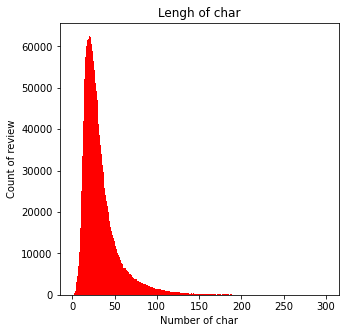

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize = (5,5))
plt.hist(a, bins=300, range=[0, 300], facecolor='r', label='char')
plt.title('Lengh of char')
plt.xlabel('Number of char')
plt.ylabel('Count of review')
plt.show()

## Label Count

In [ ]:
print('평균 : {0}'.format(a.mean()))
print('최대 : {0}'.format(a.max()))
print('최소 : {0}'.format(a.min()))
print('표준편차 : {0}'.format(a.std()))


평균 : 32.98515077436809
최대 : 16542
최소 : 1
표준편차 : 46.12002572635075


In [ ]:
percentile25 = np.percentile(a, 25)
percentile50 = np.percentile(a, 50)
percentile75 = np.percentile(a, 75)
percentileIQR = percentile75 - percentile25
percentileMAX = percentile75 + percentileIQR * 1.5
print(f"char 25/100분위:  {percentile25:7.2f}")
print(f"char 50/100분위:  {percentile50:7.2f}")
print(f"char 75/100분위:  {percentile75:7.2f}")
print(f"char IQR:        {percentileIQR:7.2f}")
print(f"char MAX/100분위: {percentileMAX:7.2f}")

char 25/100분위:    19.00
char 50/100분위:    26.00
char 75/100분위:    39.00
char IQR:          20.00
char MAX/100분위:   69.00


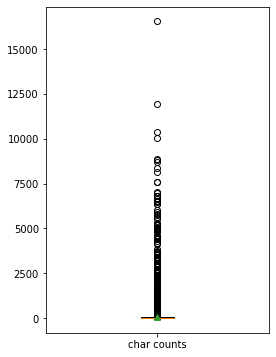

In [ ]:
plt.figure(figsize=(4, 6))
plt.boxplot(a, labels=['char counts'], showmeans=True)
plt.show()

# Small Data Project (참고 Day-18 실습)

## Train, Dev, Test 데이터 생성

In [ ]:
# df_train = pd.read_csv('multinli.train.ko.tsv', sep='\t',error_bad_lines=False)
# df_train2 = pd.read_csv('snli_1.0_train.ko.tsv', sep='\t', error_bad_lines = False)
# df_val = pd.read_csv('xnli.dev.ko.tsv', sep='\t', error_bad_lines = False)
# df_test = pd.read_csv('xnli.test.ko.tsv', sep='\t', error_bad_lines = False)

df_train = pd.read_csv('/content/drive/MyDrive/ict-ai-복합고급언어-nlp/data/multinli.train.ko.tsv', sep='\t',error_bad_lines=False)
df_train2 = pd.read_csv('/content/drive/MyDrive/ict-ai-복합고급언어-nlp/data/snli_1.0_train.ko.tsv', sep='\t', error_bad_lines = False)
df_val = pd.read_csv('/content/drive/MyDrive/ict-ai-복합고급언어-nlp/data/xnli.dev.ko.tsv', sep='\t', error_bad_lines = False)
df_test = pd.read_csv('/content/drive/MyDrive/ict-ai-복합고급언어-nlp/data/xnli.test.ko.tsv', sep='\t', error_bad_lines = False)

b'Skipping line 24426: expected 3 fields, saw 4\nSkipping line 156343: expected 3 fields, saw 4\nSkipping line 218766: expected 3 fields, saw 4\nSkipping line 232318: expected 3 fields, saw 4\nSkipping line 253493: expected 3 fields, saw 4\n'
b'Skipping line 265734: expected 3 fields, saw 4\nSkipping line 282588: expected 3 fields, saw 4\nSkipping line 350969: expected 3 fields, saw 4\n'


In [ ]:
# df_train = df_train.dropna()
# df_train2 = df_train2.dropna()
# df_val= df_val.dropna()
# df_test = df_test.dropna()

df_train = df_train.sample(10)
df_train2 = df_train2.sample(10)
df_val = df_val.sample(10)
df_test = df_test.sample(10)


In [ ]:
df_train

,sentence1,sentence2,gold_label
122737,그렇지 않으면 관광 명소가 풍부하지 않은 시나가와에는 센가쿠지가 되어서는 안 되는 ...,시나가와는 유명한 센가쿠지 사원을 넘어 인기 있는 관광 명소로 넘쳐나고 있다.,contradiction
154407,"당신에게 어울리는 곳인지 의심스럽지만요, 선생님.",나는 이곳이 너를 위한 곳이라고 생각하지 않아.,entailment
133535,다음은 보고할 수 있는 사항의 예다.,다음 예는 보고할 수 있습니다.,entailment
68423,반복적인 위험 평가를 수행함으로써 조직은 부적절한 지불을 줄이기 위한 노력의 상태와...,위험 평가는 반복해서 수행되어야 한다.,entailment
104025,"사람들이 그러한 범민족 대륙족에 대해 말할 때, 그들은 단지 인종에 대한 미국의 정...","사람들이 그런 범민족 대륙족에 대해 말할 때, 그들은 정말로 아시아 인종에 대해 이...",contradiction
4319,브릿팩은 새로운 정통성을 상징한다고 월스트리트저널의 폴 레비는 말한다.,월스트리트저널의 폴 레비는 브릿팩은 새로운 정교회라고 말한다.,entailment
243829,"예를 들어, VBA는 사람, 기술, 프로세스 및 재원의 효과적인 관리를 통해 참전용...",2001 회계연도 VBA가 정한 국가 목표는 72%였다.,entailment
63750,인디애나 주의 또 다른 무료 법률 원조의 원천은 인디애나 대법원장이 설립한 지역 프...,이 프로그램에 따라 제공되는 법적 지원은 미끄럼 급여 규모에 기초하며 무료가 아니다.,contradiction
116818,Blea Tarn에서 도로는 급격히 내려가서 Wrynose Pass로 가는 표지판이...,Wrynose Pass를 가리키는 표지판은 Blea Tarn에서 오는 T-Junct...,entailment
133031,EPA의 이해 관계자 중 다수는 환경 규제의 절차 비용과 같은 문제를 해결하기를 원...,규제 하에 있는 기업과 다른 단체들은 EPA의 많은 이해당사자들을 설명한다.,entailment


In [ ]:
# 같은 질문 0
# 다른 질문 1 

# distance가 가까울수록 0// 멀수록 무한대


# my LSTM이 유사도라서

# 비슷하게 
# 0이 될수록 다른 질문
# 1이 될수록 같은 질문


# for i, row in tqdm(df_train.iterrows(), total = len(df_train)):
#     is_duplicate = 1 - row['is_duplicate'] #분류문제라면 안바꿔도 되지만, 유사도 문제니까 exp가 분모에 있으니까 바꾼것임
    


In [ ]:
# label_to_id = {'contradiction': 0, 'neutral': 1, 'entailment': 2}
# id_to_label = {_id:label for label, _id in label_to_id.items()}

# label_to_id, id_to_label

label_to_id = {'contradiction' : 0, 'neutral' : 1, 'entailment' : 2}    
id_to_label = {id:label for label, id in label_to_id.items()}
id_to_label

{0: 'contradiction', 1: 'neutral', 2: 'entailment'}

In [ ]:
# vocab.encode_as_ids('기분이 딱 좋다')
vocab.piece_to_id('[SEP]')

# encode_As _pieces
# 안녕하세요 -> 안녕,하,세요 -> [1, 18,23]

# piece to id
# 안녕하세요 -> 토큰화 -> id

4

In [ ]:
# input이 한개일때!!!!!!!!!!
# ppt의 type 3유형

from tqdm.notebook import tqdm, trange

def make_data_1(df,vocab, n_seq):

    inputs, labels = [], []
    # n_seq = 128
    n_max = n_seq -1 # sep

    for i, row in tqdm(df_train.iterrows(), total = len(df_train)): # tqdm을 통해서/ 어떤 데이터를/ 몇번 반복할건지//i, row는 데이터에서 다 나오는값임
        # print(row,row['gold_label'])
        # print(label_to_id[row['gold_label']])
        gold_label = label_to_id[row['gold_label']]
        sentence1 = row['sentence1']
        sentence2 = row['sentence2']

        # print(vocab.encode_as_ids(sentence1))
        token1 = vocab.encode_as_ids(sentence1)
        token2 = vocab.encode_as_ids(sentence2)

        while n_max < len(token1) + len(token2):
            if len(token1) > len(token2):
                del token1[-1]
            else:
                del token2[-1]

        token = token1 + [vocab.piece_to_id('[SEP]')] + token2 # sep 넣어줘서 ppt 3 type유형에 어울리는 data로 만들어주고
        # print(token)
        token = token + [0] * (n_seq - len(token)) #  padding 넣고
        # print(token)
        assert len(token) == n_seq # 한번 방지턱

        print(gold_label, len(token), token)
        inputs.append(token)
        labels.append(gold_label)

    inputs = np.array(inputs)
    labels = np.array(labels)
    return inputs, labels

In [ ]:
train_inputs, train_labels = make_data_1(df_train, vocab,64)
train_inputs, train_labels

1 64 [131, 35, 9, 24024, 12, 28526, 84, 4, 236, 20847, 374, 10, 20, 597, 5351, 84, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 64 [441, 6050, 465, 11, 16433, 1111, 7742, 456, 8, 858, 47, 50, 7, 4, 114, 270, 136, 180, 4495, 104, 482, 2668, 2968, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 64 [4157, 1634, 288, 627, 11, 1416, 26, 294, 11, 1395, 2223, 8204, 105, 2216, 4357, 11, 1416, 15, 875, 11, 640, 672, 4721, 17, 627, 8, 2072, 9, 1175, 5937, 249, 50, 7, 4, 294, 15, 936, 961, 2216, 4357, 8, 1395, 2223, 8204, 101, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0 64 [107, 3125, 1, 260, 35, 17928, 1923, 6032, 2613, 437, 4, 57, 3154, 23, 64, 1427, 13, 292, 7, 57, 386, 7340, 1220, 128, 43, 14609, 9, 7114, 8, 1688, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

(array([[  131,    35,     9, 24024,    12, 28526,    84,     4,   236,
         20847,   374,    10,    20,   597,  5351,    84,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0],
        [  441,  6050,   465,    11, 16433,  1111,  7742,   456,     8,
           858,    47,    50,     7,     4,   114,   270,   136,   180,
          4495,   104,   482,  2668,  2968,     7,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,    

In [ ]:
# input이 2개일떄!!!!!!!!!!!1
# ppt의 type 2유형

10

In [ ]:
def make_data_2(df, vocab, n_seq):

    inputs_1, inputs_2, labels = [], [], []
    # n_seq = 128

    for i ,row in tqdm(df_train.iterrows(), total = len(df_train)):
        gold_label = label_to_id[row['gold_label']]
        sentence1 = row['sentence1']
        sentence2 = row['sentence2']

        token1 = vocab.encode_as_ids(sentence1)[:n_seq] # limit 128 까지
        # print(token1)
        token1 = token1 + [0] * (n_seq-len(token1))
        # print(token1)
        token2 = vocab.encode_as_ids(sentence2)[:n_seq]
        token2 = token2 + [0] * (n_seq - len(token2))

        assert len(token1) == n_seq
        assert len(token2) == n_seq

        # print(gold_label, len(token1), token1, len(token2), token2)
        inputs_1.append(token1)
        inputs_2.append(token2)
        labels.append(gold_label)

    inputs_1 = np.array(inputs_1)
    inputs_2 = np.array(inputs_2)
    labels = np.array(labels)

    return inputs_1, inputs_2, labels


In [ ]:
make_data_2(df_train, vocab, 64)

(array([[ 1731,  2150,  1907,  1731,  2150,   131,    85,    11,  2690,
             9,  9211,    47,    87,   131,   809,   117,   131, 13609,
         20629,     8,  1227,    11, 10822,     8, 13980,    93,   171,
          1553,     1,  1239,   142,   515,     9,  1010,    50,     7,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0],
        [ 8574,  2032,  1237,  4526,   473,    97,   805,  1160,     9,
          4526,   473,    23,  2721,    15,   657,    14,   381,    11,
          4639,   381,    11, 23495,     9,   286,  5444,  1175,   385,
             9,  2889,     7,   296,   212,  1848,  5487,    17,   751,
         32000,   122,     7,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,    

In [ ]:
train_inputs_1, train_inputs_2, train_label = make_data_2(df_train, vocab , 64)
val_inputs_1, val_inputs_2, val_label = make_data_2(df_val, vocab , 64)
test_inputs_1, test_inputs_2, test_label = make_data_2(df_test, vocab , 64)

In [ ]:
print(train_inputs_1.shape, train_inputs_2.shape, train_label.shape)

(10, 64) (10, 64) (10,)


## Modeling

In [ ]:
# 환경 설정

import argparse

args = {
    # random seed value
    "seed": 1234
}
args = argparse.Namespace(**args)

print(args)
args.n_vocab = len(vocab)
args.d_model = 256
args.n_out = 3
args

Namespace(seed=1234)


Namespace(d_model=256, n_out=3, n_vocab=32007, seed=1234)

In [ ]:
def build_model(args):
    inputs_1 = tf.keras.layers.Input((None,), name = 'input_ 1') # (bs, n_seq) # 토큰의 숫자지 [ 0,1,20,15,36]
    inputs_2 = tf.keras.layers.Input((None,), name = 'input_ 2') # (bs,n_seq)
    

    embedding = tf.keras.layers.Embedding(args.n_vocab, args.d_model, name = 'embedding')
    hidden_1 = embedding(inputs_1) # (bs, n_seq, ,d_model)
    hidden_2 = embedding(inputs_2) # (bs,n_seq, d_model)

    lstm = tf.keras.layers.LSTM(units = args.d_model, go_backwards = True, name = 'LSTM') # return sequence가 성ㅄ으니까 n_seq가 없지! // 요고 fixed vector 뽑아낸 거잖아

    hidden_1 = lstm(hidden_1) #(bs, d_model ) # day 12 실습
    hidden_2 = lstm(hidden_2) #(bs, d_model)

    concat_hidden = tf.concat([hidden_1,hidden_2], axis = 1)

    linear = tf.keras.layers.Dense(args.n_out, activation=tf.nn.softmax, name = 'out_linear')
    y_pred = linear(concat_hidden)

    model = tf.keras.Model(inputs = (inputs_1, inputs_2), outputs=y_pred)
    return model

    # encoder, decoder 형태 아님
    # similarity 모델임

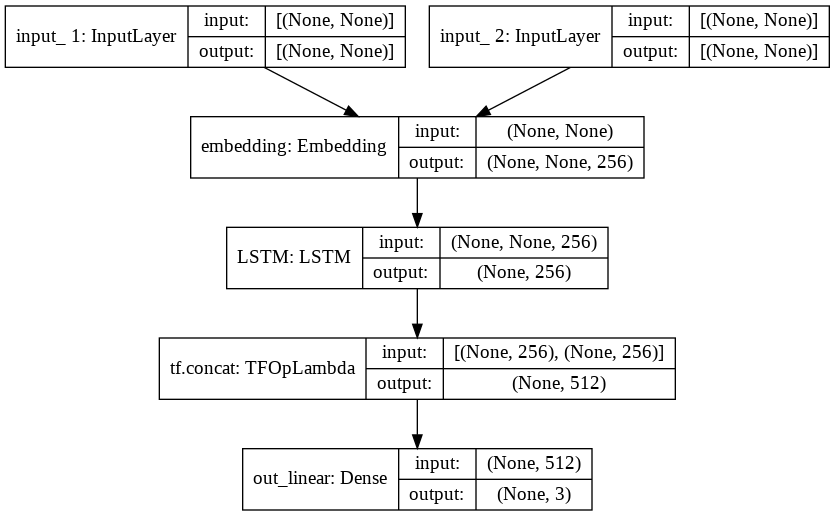

In [ ]:
model = build_model(args)
tf.keras.utils.plot_model(model, 'model.png', show_shapes = True)

## Train

In [ ]:
# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 20)
save_weights = tf.keras.callbacks.ModelCheckpoint(os.path.join(kornli_dir , 'baseline.hdf5'),
                                                   monitor = 'val_accuracy',
                                                   verbose = 1,
                                                   save_best_only = True,
                                                   mode = 'max',
                                                   save_freq = 'epoch',
                                                   save_weights_only = True)
csv_logger = tf.keras.callbacks.CSVLogger(os.path.join(kornli_dir, 'baseline.csv'))
                                                    

In [ ]:
history = model.fit((train_inputs_1, train_inputs_2), train_label,
                    epochs = 100,
                    batch_size = 64,
                    validation_data = ((val_inputs_1, val_inputs_2), val_label),
                    callbacks = [early_stopping, save_weights, csv_logger])



Epoch 1/100
2338/6022 [==========>...................] - ETA: 50:29 - loss: 0.9944 - accuracy: 0.5022

## 평가

## 배포

# All Data Project

## Train, Test 데이터 생성

## Modeling

In [ ]:
# attention
def get_pad_mask(token, i_pad = 0):
    """
    pad mask 계산하는 함수
    :param tokens: tokens (bs, n_seq)
    :param i_pad: id of pad
    :return mask: pad mask (pad: 1, other: 0)
    """
    # 0인 부분을 True로
    mask = tf.math.equal(token, i_pad)
    # print(mask)

    #boolean -> float32
    mask = tf.cast(mask, tf.float32)
    # print(mask)
    
    #expand dimension for n_seq
    mask = tf.expand_dims(mask, axis = 1) # (bs,n_seq)였는데 expand로 dimension 1확장해야지 안그럼 브로드 캐스팅(아래로 쭉 복사) 못하지!
    # print(mask)
    return mask


In [ ]:
train_inputs_1[0]
get_pad_mask(train_inputs_1[0])

<tf.Tensor: shape=(64, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
class ScaleDotProductAttention(tf.keras.layers.Layer):
    """
    Scale Dot Product Attention Class
    """
    def __init__(self, name = "scale_dot_product_attention"):
        """
        생성자
        :param name: layer name
        """
        super().__init__(name = name)

    def call(self, inputs):
        """
        layer 실행
        :param inputs : Q ,K ,V ,attn_mask tuple
        :return attn_out : attention 실행결과
        """
        Q,K,V,attn_mask = inputs
        # print(Q,K,V,attn_mask)

        #matmul Q, K (transpose_b = True)
        attn_score = tf.matmul(Q, K, transpose_b = True) # QxK.T
        # print(attn_score)

        #get scale = d_model ** 0.5
        scale = tf.math.sqrt(tf.cast(tf.shape(K)[-1], tf.float32)) # k의 shape은 (bs, vocab_size, d_model)이니까

        #divide by scale
        attn_scale = tf.math.divide(attn_score, scale) # 스케일로 나눠주기
        # print(attn_scale)
    
        # do mask (subtract 1e-9 for masked value)
        attn_scale -= 1.e9 * attn_mask # 1인부분에 엄청 큰 음수를 곱하면 이되고 0파트는 오히려 그대로지
                                        # softmax에는  엄청 큰 음수만 0에 가깝고
                                        # 나머지 값 scale은 -1~ 1사이에 있으니까 마치 패딩, graident가 안흘러서 학습이 안된것과 마찬가지로 되는거지
        # print(attn_scale)

        #calculate attention prob
        attn_prob = tf.nn.softmax(attn_scale, axis = -1) # softmax(QxK.T/sclae) with mask
        # print(attn_prob)

        # weighted sum of V
        attn_out = tf.matmul(attn_prob, V)
        return attn_out


In [ ]:
embed_weight = np.random.randint(-90, 100, (args.n_vocab, args.d_model)) /100
embed = tf.keras.layers.Embedding(args.n_vocab, args.d_model, weights=[embed_weight]) # 위에 설정한 weight로 초기값을 시작할려고
test = embed(train_inputs_1[0])# (64,128) = (n_seq, d_model) # 지금은 단일data하나니까 bs = 1인거임
test

<tf.Tensor: shape=(64, 256), dtype=float32, numpy=
array([[-0.17, -0.06,  0.6 , ..., -0.15,  0.74,  0.08],
       [ 0.97, -0.07, -0.63, ...,  0.92,  0.56, -0.67],
       [ 0.19,  0.96,  0.2 , ...,  0.86, -0.28,  0.33],
       ...,
       [ 0.6 ,  0.87, -0.48, ...,  0.66, -0.49, -0.33],
       [ 0.6 ,  0.87, -0.48, ...,  0.66, -0.49, -0.33],
       [ 0.6 ,  0.87, -0.48, ...,  0.66, -0.49, -0.33]], dtype=float32)>

In [ ]:
Q = test
K = test
V = test

enc_self_mask = get_pad_mask(train_inputs_1[0])
enc_self_mask

attention = ScaleDotProductAttention()
attn_out = attention((Q, K, V, enc_self_mask)) # input이 4개의 tuple이지
attn_out

<tf.Tensor: shape=(64, 256), dtype=float32, numpy=
array([[-0.26081   , -0.35116974,  0.20361385, ...,  0.20892493,
        -0.08148408, -0.31986496],
       [-0.49430597, -0.49705282, -0.06697787, ..., -0.25813207,
        -0.22261111,  0.39269346],
       [ 0.09000347, -0.36161047,  0.13173635, ...,  0.64433223,
         0.23506327,  0.13578482],
       ...,
       [-0.09078124, -0.18312494,  0.16765617, ...,  0.12953126,
         0.10640622, -0.08515626],
       [-0.09078124, -0.18312494,  0.16765617, ...,  0.12953126,
         0.10640622, -0.08515626],
       [-0.09078124, -0.18312494,  0.16765617, ...,  0.12953126,
         0.10640622, -0.08515626]], dtype=float32)>

In [ ]:
# mask2,1 헷갈림
# 최종 shape은 GMP에 의해서 (bs,d_model)이  밎나, (bs,n_seq)는 아닌지

In [ ]:
def build_model_type2(args):
    inputs_1 = tf.keras.layers.Input((None,), name = 'input_1') # (bs, n_Seq)
    inputs_2 = tf.keras.layers.Input((None,), name = 'input_2') # (bs, n_seq)

    mask_1 = get_pad_mask(inputs_1)
    mask_2 = get_pad_mask(inputs_2)
    print(mask_1.shape)  # (bs,1,n_seq)
    print(mask_2.shape)  # 

    embedding = tf.keras.layers.Embedding(args.n_vocab, args.d_model, name = 'embedding')
    hidden_1 = embedding(inputs_1) # (bs,n_Seq, d_model)
    hidden_2 = embedding(inputs_2) # (bs,n_seq, d_model)
    print(hidden_1.shape)
    print(hidden_2.shape)
    
    lstm = tf.keras.layers.LSTM(units = args.d_model, return_sequences=True, go_backwards=True, name="LSTM")
    hidden_1 = lstm(hidden_1) #(bs, n_seq, d_model) # return _sequences = True로 했으니까 
    hidden_2 = lstm(hidden_2) # (bs, n_seq, d_model)

    attention = ScaleDotProductAttention()
    attention_1 = attention((hidden_1, hidden_2, hidden_2, mask_2)) # mask2 -> pad인 부분을 학습 안하게 하려고 
                                                                    # s부분, 즉 hidden2부분의 
    attention_2 = attention((hidden_2, hidden_1, hidden_1, mask_1))
 
    pooling = tf.keras.layers.GlobalMaxPooling1D()    # 지금 size가 (bs, n_seq, d_model)이니까 concat하려면 pooling을 해야되지
    hidden_1 = pooling(hidden_1)
    hidden_2 = pooling(hidden_2)
    attention_1 = pooling(attention_1)
    attention_2 = pooling(attention_2) # 총 4개를 concat하려나봐, attention 이전 2개, 이후 2개
                                        # 지금 shape은 GMP이후 니까 (bs, d_model)이지? 맞나?
                                        # 아 concat하려면 fix_vecter가 되어야 하니까 (Bs, d_model)이 맞는거 같은데

    hidden = tf.concat([hidden_1, hidden_2, attention_1, attention_2], axis =-1) # (bs, 4 * unit) = (bs, 4* d_model)
    linear = tf.keras.layers.Dense(args.d_model, activation  = 'relu')
    hidden = linear(hidden)

    linear = tf.keras.layers.Dense(args.n_out, activation = 'softmax', name = 'out_linear')
    y_pred = linear(hidden) # (bs, n_out)

    model = tf.keras.Model( inputs = (inputs_1, inputs_2), outputs= y_pred)
    return model

(None, 1, None)
(None, 1, None)
(None, None, 256)
(None, None, 256)


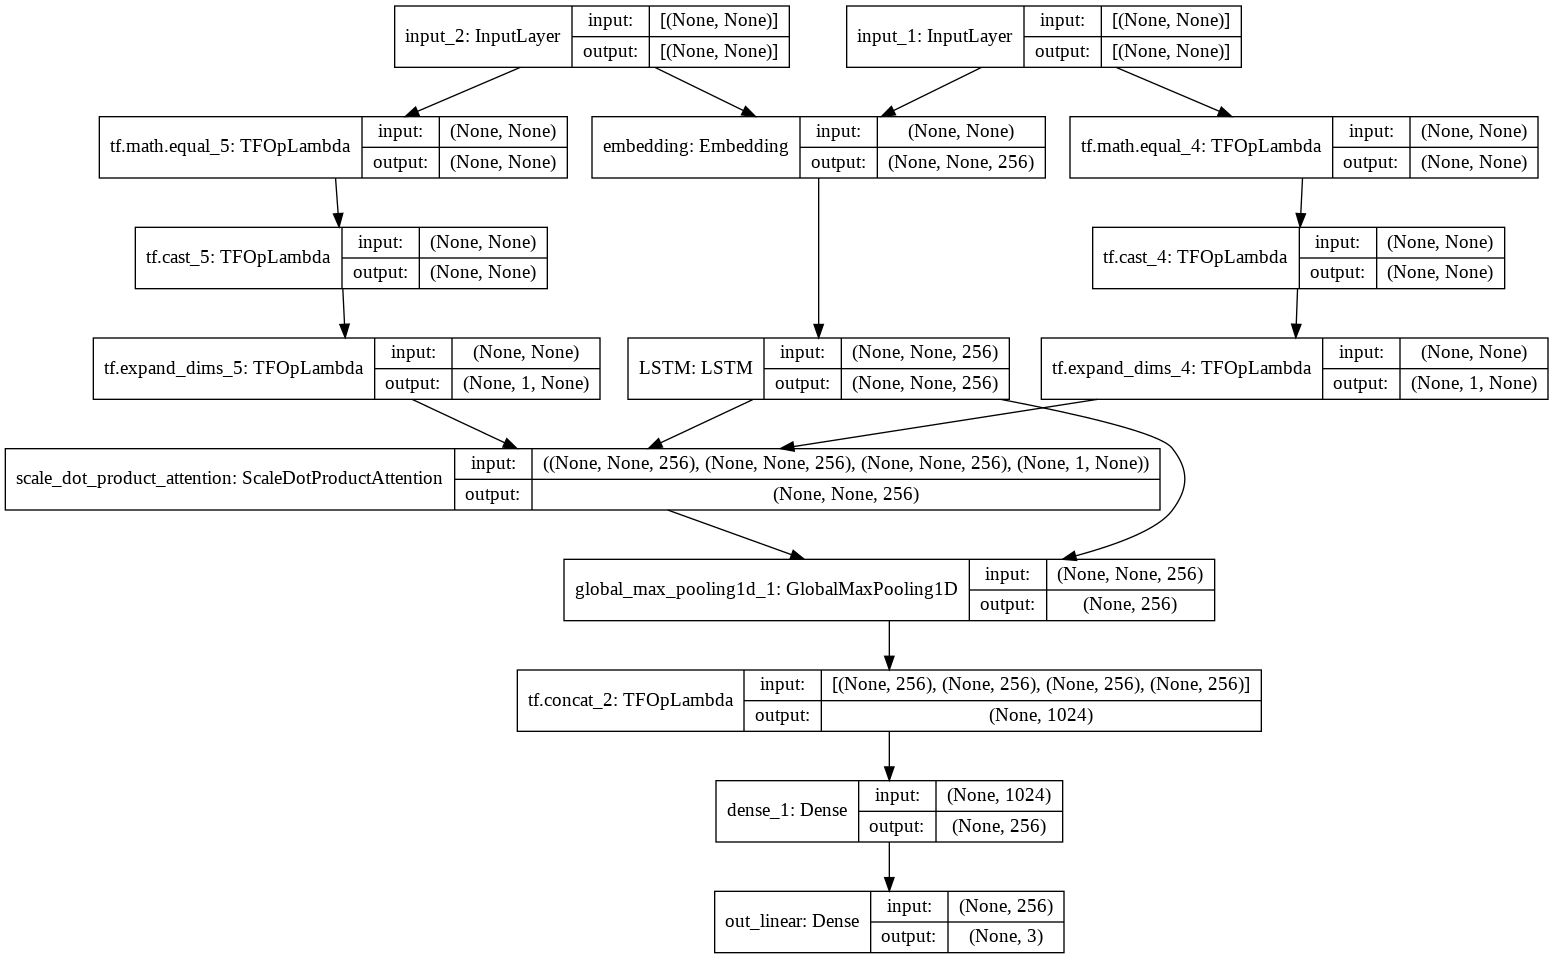

In [ ]:
model =build_model_type2(args)
tf.keras.utils.plot_model(model, 'model.png', show_shapes = True)

Namespace(d_model=256, n_out=3, n_vocab=32007, seed=1234)

## Train

## 평가

## 배포